In [1]:
from os import listdir
from os.path import isfile, join
mypath ='./train'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [17]:
len(onlyfiles)

17806

In [36]:
a=[]
b=[]
for i in onlyfiles:
    a.append(i.split(".")[0])


In [6]:
b=[]
c=[]
for i in onlyfiles:
    b.append(i.split("orignal")[0])
b

['10265',
 '1026mask.tif',
 '1026',
 '10270mask.tif',
 '10270',
 '21813',
 '21815mask.tif',
 '21815',
 '21816mask.tif',
 '21816',
 '12821',
 '12822mask.tif',
 '12822',
 '12823mask.tif',
 '12823',
 '12910',
 '12951',
 '12952mask.tif',
 '13402',
 '13403mask.tif',
 '13403',
 '13404mask.tif',
 '13404',
 '13464',
 '13465mask.tif',
 '13465',
 '13466mask.tif',
 '13466',
 '1346mask.tif',
 '13699',
 '13700mask.tif',
 '13700',
 '14211',
 '14212mask.tif',
 '14212',
 '14213mask.tif',
 '14213',
 '14217mask.tif',
 '14217',
 '14218mask.tif',
 '16533',
 '16537mask.tif',
 '16537',
 '16538mask.tif',
 '16538',
 '16539mask.tif',
 '16539',
 '17081',
 '25606',
 '25607mask.tif',
 '25607',
 '25608mask.tif',
 '25608',
 '25609mask.tif',
 '25609',
 '25610mask.tif',
 '25610',
 '25611mask.tif',
 '25611',
 '25612mask.tif',
 '25612',
 '8870',
 '8871mask.tif',
 '8871',
 '8872mask.tif',
 '8872',
 '8873mask.tif',
 '8873',
 '8874mask.tif',
 '8874',
 '28000',
 '28001mask.tif',
 '28001',
 '28002mask.tif',
 '28002',
 '3600

In [7]:
c=[]
for i in b:
    c.append(i.split("mask")[0])

In [20]:
counters= int(0)
import collections
counter=collections.Counter(c)
for i in counter.values():
    if i==2:
        counters=counters+1
counters

8903

In [14]:
k=list(set([x for x in c if c.count(x) > 1]))

In [16]:
len(k)

8903

In [21]:
import os
for i in k:
    os.mkdir(i)

In [23]:
import shutil
for i in k:
    shutil.copy(i+'orignal.tif', i)
    shutil.copy(i+'mask.png', i)

FileNotFoundError: [Errno 2] No such file or directory: '19177orignal.tif'

In [24]:
for i in k:
    print(i)

9126_500_f00183_
13106_500_f00047
9344_500_f00111_
14213_500_f00011
17643_500_f00010
12751_500_f00028
14192_500_f00042
12932_500_f00040
9257_500_f00006_
8974_500_f00015_
25740_500_f00179
12811_500_f00068
13461_500_f00004
9081_500_f00076_
14210_500_f00009
12909_500_f00032
9124_500_f00141_
9024_500_f00015_
17642_500_f00001
9256_500_f00216_
13688_500_f00001
12826_500_f00030
10307_500_f00025
12749_500_f00174
12882_500_f00257
9022_500_f00027_
12905_500_f00001
12951_500_f00099
25279_500_f00110
13617_500_f00023
12822_500_f00011
17710_500_f00012
12884_500_f00092
12750_500_f00003
12891_500_f00028
16552_500_f00028
12752_500_f00057
17077_500_f00106
10273_500_f00020
10261_500_f00001
8917_500_f00073_
13402_500_f00080
17557_500_f00021
13019_500_f00028
13025_500_f00096
12871_500_f00003
13024_500_f00010
16555_500_f00028
17565_500_f00029
12949_500_f00056
25289_500_f00054
25741_500_f00051
8975_500_f00346_
9320_500_f00113_
10282_500_f00040
12880_500_f00448
9036_500_f00002_
13403_500_f00035
25612_500_f000

In [1]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

IMG_WIDTH = 2000
IMG_HEIGHT = 2000
IMG_CHANNELS = 3
path1 = 'All Images from 40x dataset/'
path2 = 'Marked/'
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

/home/tejasv/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from scipy import ndimage
n = 10
l = 256
im = np.zeros((l, l))
#np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

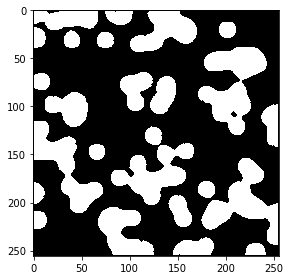

In [10]:
imshow(close_img)

In [59]:
img = imread('8865_500_f00003_original.tif')

NameError: name 'imread' is not defined

In [5]:
X_train = np.zeros((80, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((80, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
print('Getting and resizing train images and marked ... ')
white = [255,255,255]
black = [0,0,0]
sys.stdout.flush()
for n in range(1,80):
    img = imread(path1 + str(n) + '.jpg')[:,:,:IMG_CHANNELS]
    X_train[n] = img


Getting and resizing train images and marked ... 


In [9]:
for n in range(1,80):
    img = imread(path2 + str(n) + '.tif')[:,:,:IMG_CHANNELS]
    Y_train[n] = img

/home/tejasv/.local/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [14]:
t=X_train[1]
t1=Y_train[1]

In [27]:
Y_train1 = np.zeros((80, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
for i in range(0,80):
    t=X_train[i]
    t1=Y_train[i]
    for x in range(0,width):
        for y in range(0,height):
            channels_xy = t1[y,x]
            channels_xy1 = t[y,x]
            if all(channels_xy == white) and all(channels_xy1 != white):    
                t1[y,x] = white
            else:
                t1[y,x] = black
    Y_train1[i]= t1

In [28]:
Y_train=Y_train1

In [37]:
np.save(('ytrain.npy'),Y_train1)

In [32]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save(outfile, Y_train1)

In [38]:
k2 = np.load('ytrain.npy')

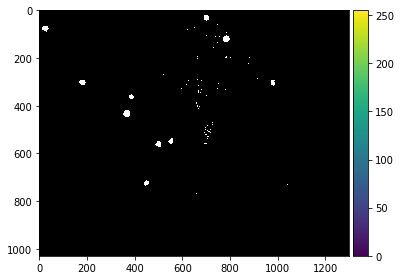

In [43]:
imshow(k2[79])
plt.show()

In [31]:
x2 = np.arange(10)
x2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

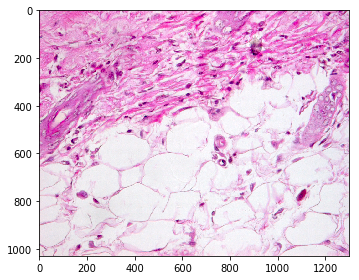

In [26]:
imshow(X_train[1])
plt.show()

In [8]:
for n in range(1,2):
    img = imread(path2 + str(n) + '.tif')[:,:,:IMG_CHANNELS]
    img1 = imread(path1 + str(n) + '.jpg')[:,:,:IMG_CHANNELS]
    height, width, channels = img.shape    
    for x in range(0,width):
        for y in range(0,height):
            channels_xy = img[y,x]
            channels_xy1 = img1[y,x]
            if all(channels_xy == white) and all(channels_xy1 != white):    
                img[y,x] = white
            else:
                img[y,x] = black
            Y_train[n] = img

KeyboardInterrupt: 

In [3]:
import cv2
import numpy as np
img = cv2.imread("All Images from 40x dataset/10.jpg")
b,g,r = cv2.split(img)
img1 = cv2.imread("Marked/10.tif")
b1,g1,r1 = cv2.split(img1)

In [4]:
img = cv2.imread("Marked/10.tif")
img1 = cv2.imread("All Images from 40x dataset/10.jpg")
height, width, channels = img.shape

white = [255,255,255]
black = [0,0,0]

for x in range(0,width):
    for y in range(0,height):
        channels_xy = img[y,x]
        channels_xy1 = img1[y,x]
        
        if all(channels_xy == white) and all(channels_xy1 != white):    
            img[y,x] = white

        else:
            img[y,x] = black

In [5]:
img.shape

(1030, 1300, 3)

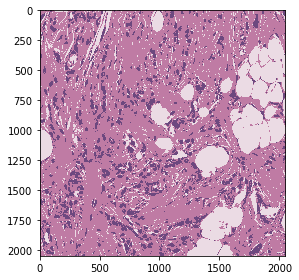

In [28]:
imshow(res2)
plt.savefig('foo.png')
plt.show()


In [29]:
img1[[0][0]]

array([[199, 162, 226],
       [196, 155, 222],
       [206, 167, 223],
       ...,
       [180, 142, 232],
       [223, 186, 218],
       [220, 183, 215]], dtype=uint8)

In [4]:
img1.shape

(1030, 1300, 3)

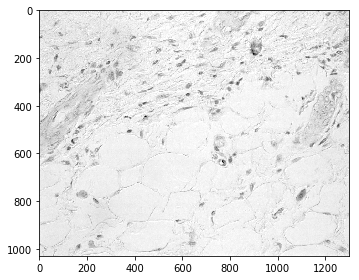

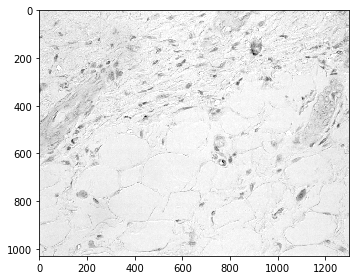

In [4]:
imshow(r)
plt.show()
imshow(r1)
plt.show()

In [3]:
import numpy as np
import cv2

img = pic
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

imshow(res2)

NameError: name 'pic' is not defined

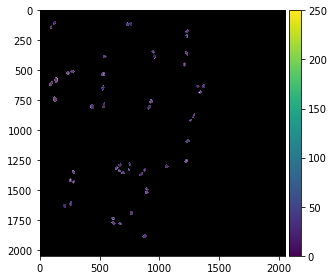

In [14]:
imshow(pic)

In [27]:
import cv2
pic=cv2.imread('8865_500_f00003_original.tif')
pic1=cv2.imread('8865_500_f00003_mask.png')

In [28]:
height, width, channels = pic.shape

white = [255,255,255]
black = [0,0,0]

for x in range(0,2048):
    for y in range(0,2048):
        channels_xy1 = pic1[y,x]
        
        if all(channels_xy1 != white):    
            pic[y,x] = black


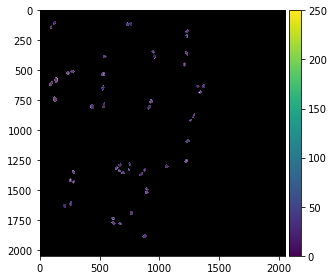

In [29]:
imshow(pic)

In [30]:
from scipy import ndimage
n = 10
l = 2048
black = [0,0,0]
im = np.zeros((l, l))
#np.random.seed(1)
for x in range(0,2048):
    for y in range(0,2048):
        channels_xy1 = pic[y,x]
        if all(channels_xy1 == black):    
            im[y,x] = 0
        else:
            im[y,x] = 1

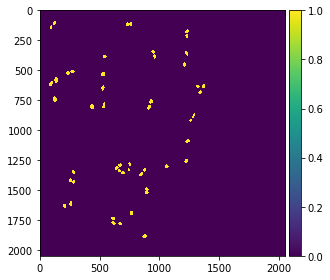

In [31]:
imshow(im)

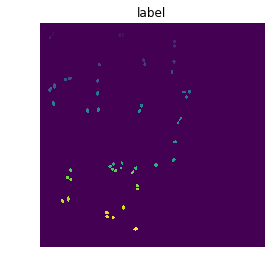

In [32]:
from scipy import ndimage
labels, nb = ndimage.label(im)

plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

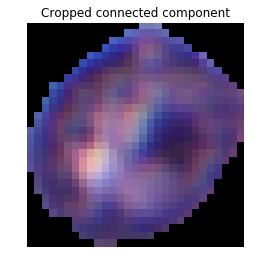

In [33]:
sl = ndimage.find_objects(labels==20)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(pic[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

plt.show()

In [6]:
import cv2
#reading the image 
image = pic
edged = cv2.Canny(image, 10, 250)
cv2.imshow("Edges", edged)
cv2.waitKey(0)
 
#applying closing function 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2.imshow("Closed", closed)
cv2.waitKey(0)
 
#finding_contours 
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
	cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
cv2.imshow("Output", image)

ValueError: too many values to unpack (expected 2)

# K-Mean

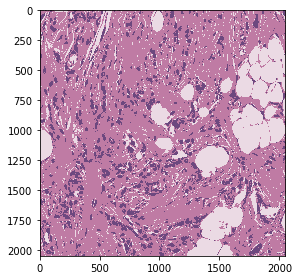

In [2]:
import numpy as np
import cv2
img=cv2.imread('8865_500_f00003_original.tif')
#img = cv2.imread('10256_500_f00001_original.tif')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

imshow(res2)

In [3]:
k= np.unique(res2[0], axis=0)
k

array([[109,  72, 127],
       [191, 123, 164],
       [235, 218, 228]], dtype=uint8)

In [4]:
tt=res2
#kk=pic

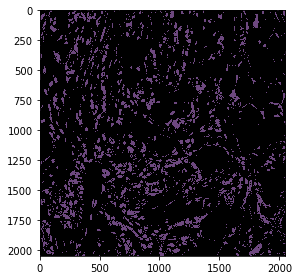

In [5]:
#height, width, channels = pic.shape

white = [255,255,255]
cl1=[109,  72, 127]
cl2= [191, 123, 164]
cl3= [235, 219, 228]
black = [0,0,0]

for x in range(0,2048):
    for y in range(0,2048):
        channels_xy1 = tt[y,x]
        
        if all(channels_xy1 != cl1):    
            tt[y,x] = black
imshow(tt)

In [36]:
plt.figure( figsize = (10,10))
plt.imshow(close_img)
plt.show()

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

<Figure size 720x720 with 1 Axes>

In [6]:
from scipy import ndimage
n = 10
l = 2048
black = [0,0,0]
im = np.zeros((l, l))
#np.random.seed(1)
for x in range(0,2048):
    for y in range(0,2048):
        channels_xy1 = tt[y,x]
        if all(channels_xy1 == black):    
            im[y,x] = 0
        else:
            im[y,x] = 1

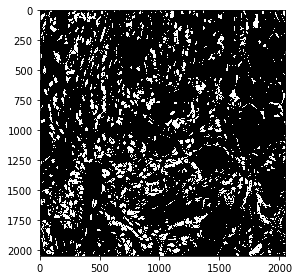

In [7]:
imshow(im)

In [8]:
open_img = ndimage.binary_opening(im)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

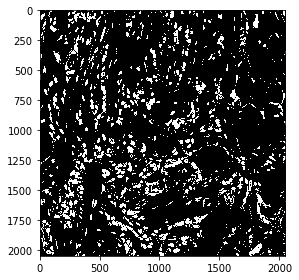

In [10]:
imshow(close_img )

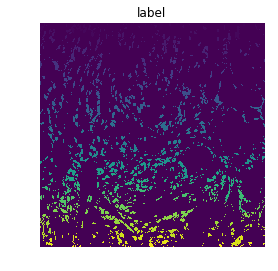

In [11]:
from scipy import ndimage
labels, nb = ndimage.label(close_img)

plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

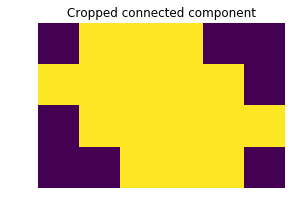

In [26]:
sl = ndimage.find_objects(labels==2000)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(close_img[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

plt.show()